In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('age-income.csv')
df

,age,Income(k)
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


In [7]:
df.head()

,age,Income(k)
0,21,60
1,20,55
2,22,60
3,22,61
4,23,65


In [8]:
df.tail()

,age,Income(k)
4,23,65
5,21,62
6,25,65
7,30,70
8,31,68


In [9]:
df.corr()

,age,Income(k)
age,1.000000,0.887145
Income(k),0.887145,1.000000


Text(0.5, 1.0, 'Age and Income')

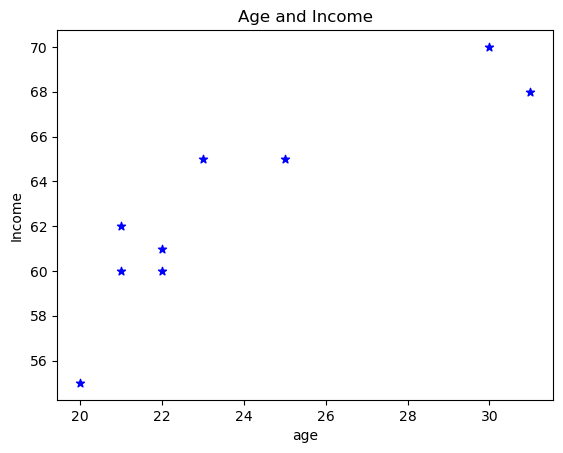

In [10]:
plt.scatter(df['age'] , df['Income(k)'], color='blue', marker='*')
plt.xlabel('age')
plt.ylabel('Income')
plt.title('Age and Income')

In [11]:
df.describe()

,age,Income(k)
count,9.000000,9.000000
mean,23.888889,62.888889
std,4.013865,4.594683
min,20.000000,55.000000
25%,21.000000,60.000000
50%,22.000000,62.000000
75%,25.000000,65.000000
max,31.000000,70.000000


In [12]:
x = df['age']
y = df['Income(k)']

In [29]:
x_pred = np.array([22])

## KNN 

In [17]:
knn = KNeighborsRegressor(n_neighbors=3)

In [18]:
knn.fit(x.values.reshape(-1,1), y)

KNeighborsRegressor(n_neighbors=3)

In [30]:
predict_income = knn.predict(x_pred.reshape(1,-1))
predict_income

array([60.33333333])

## Linear Regression 

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [22]:
predicted_income_lr = lr.predict(x_pred.reshape(1,-1))
predicted_income_lr

array([60.97068966])

In [23]:
df_pred = pd.DataFrame(x_pred, columns=['age'])
df_pred

,age
0,22


In [24]:
df_pred['Income(k)'] = predict_income
df_pred

,age,Income(k)
0,22,60.333333


<Axes: >

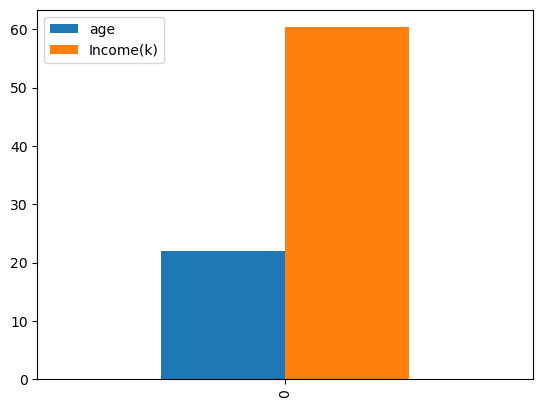

In [25]:
df_pred.plot(kind='bar')

In [31]:
df_pred = pd.DataFrame({'age': [22], 'Predicted_Income_KNN': predict_income, 'Predicted_Income_LR': predicted_income_lr})
print(df_pred)

   age  Predicted_Income_KNN  Predicted_Income_LR
0   22             60.333333             60.97069


## Comparison 

In [27]:
comparison_df = df.copy()
comparison_df.loc[len(comparison_df.index)] = [22, np.nan]
comparison_df = pd.concat([comparison_df, df_pred], axis=1)

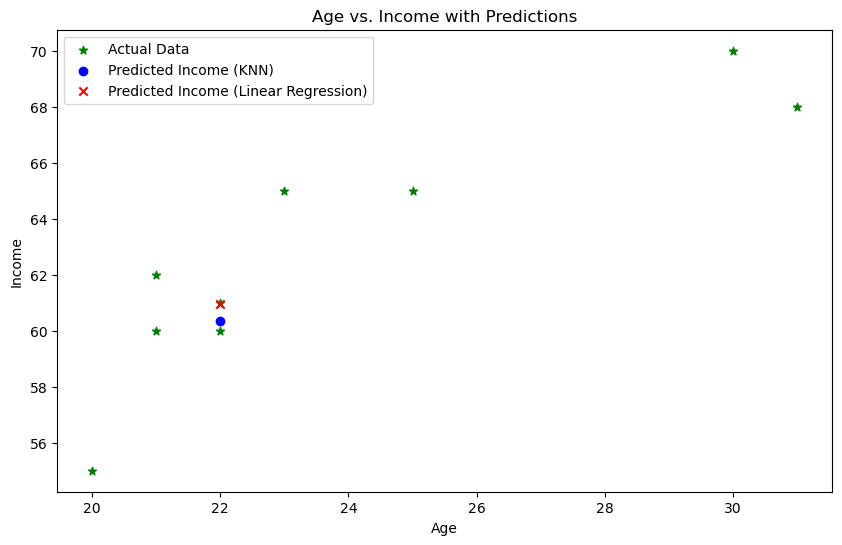

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['Income(k)'], color='green', marker='*', label='Actual Data')
plt.scatter([22], predict_income, color='blue', marker='o', label='Predicted Income (KNN)')
plt.scatter([22], predicted_income_lr, color='red', marker='x', label='Predicted Income (Linear Regression)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income with Predictions')
plt.legend()
plt.show()